# Student Exam Score Prediction using Machine Learning

## Introduction

This project explores the factors that influence student academic performance and aims to predict exam scores using machine learning techniques. The dataset, Student Performance Factors (Kaggle), contains information such as study hours, attendance, parental involvement, access to resources, motivation, and more.

Through data preprocessing, exploratory data analysis (EDA), and regression modeling, we build and evaluate a predictive model. The main objective is to identify key features that affect student outcomes and assess how well linear regression can estimate exam performance.

Additionally, we experiment with polynomial regression and feature selection (dropping/keeping certain attributes) to compare performance, ensuring the model is both accurate and interpretable.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Cleaning & Preprocessing

## Data loading and analyzing

In [ ]:
dff = pd.read_csv("/content/drive/MyDrive/01 Machine Learning/Internship/ELEVVO/task /StudentPerformanceFactors.csv")
df= dff.copy()
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Missing values filled (mean for numeric, mode for categorical).


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.shape

(6607, 20)

In [ ]:
# df['Teacher_Quality','Parental_Education_Level','Distance_from_Home']
for col in df:
  # print(df.isnull().sum())
  if df[col].dtype=="object":
    df[col] = df[col].fillna(df[col].mode()[0])
  else:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# df['Score '].hist()
# plt.scatter(df['StudyHours'], df['Score'])
# sns.boxplot(x='Preparation', y='Score', data=df)
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Converted categorical features using Label Encoding (binary) and One-Hot Encoding (multi-class).


In [ ]:
categorical_col = pd.DataFrame()
numerical_col = pd.DataFrame()

for col in df:
  if (df[col].dtype=='int64') & (col != 'Exam_Score'):
    numerical_col[col] = df[col]
  elif (df[col].dtype=='object') & (col != 'Exam_Score'):
    categorical_col[col] = df[col]

categorical_col.head()
# numerical_col.head()

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
one = OneHotEncoder()

for col in categorical_col:
  if (len(categorical_col[col].unique()) == 2) :
    df[col] = le.fit_transform(df[col])
  else:
    df = pd.get_dummies(df, columns=[col], prefix=[col], drop_first=True)



In [ ]:
for col in df:
  df[col] = df[col].astype(int)
df.head()


,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,School_Type,Physical_Activity,Learning_Disabilities,...,Family_Income_Low,Family_Income_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near
0,23,84,0,7,73,1,0,1,3,0,...,1,0,0,1,0,1,1,0,0,1
1,19,64,0,8,59,1,2,1,4,0,...,0,1,0,1,0,0,0,0,1,0
2,24,98,1,7,91,1,2,1,4,0,...,0,1,0,1,1,0,0,1,0,1
3,29,89,1,8,98,1,1,1,4,0,...,0,1,0,1,0,0,1,0,1,0
4,19,92,1,6,65,1,3,1,4,0,...,0,1,0,0,1,0,0,0,0,1


## Scaled numerical columns using StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in numerical_col:
  df[col] = scaler.fit_transform(numerical_col[[col]])
  print(f'{col} have values==  {df[col].min()} and {df[col].max()}')

Hours_Studied have values==  -3.167760040998064 and 4.010702074401082
Attendance have values==  -1.7301583453437241 and 1.7340645752147938
Sleep_Hours have values==  -2.0633796127548307 and 2.023788458440242
Previous_Scores have values==  -1.7411669598524377 and 1.7313700641165848
Tutoring_Sessions have values==  -1.213934457288018 and 5.287607712578786
Physical_Activity have values==  -2.8779530969929286 and 2.9407757585685377


In [ ]:

for col in df:
  print(f'{col} have values==  {df[col].min()} and {df[col].max()}')

Hours_Studied have values==  -3.167760040998064 and 4.010702074401082
Attendance have values==  -1.7301583453437241 and 1.7340645752147938
Extracurricular_Activities have values==  0 and 1
Sleep_Hours have values==  -2.0633796127548307 and 2.023788458440242
Previous_Scores have values==  -1.7411669598524377 and 1.7313700641165848
Internet_Access have values==  0 and 1
Tutoring_Sessions have values==  -1.213934457288018 and 5.287607712578786
School_Type have values==  0 and 1
Physical_Activity have values==  -2.8779530969929286 and 2.9407757585685377
Learning_Disabilities have values==  0 and 1
Gender have values==  0 and 1
Exam_Score have values==  55 and 101
Parental_Involvement_Low have values==  0 and 1
Parental_Involvement_Medium have values==  0 and 1
Access_to_Resources_Low have values==  0 and 1
Access_to_Resources_Medium have values==  0 and 1
Motivation_Level_Low have values==  0 and 1
Motivation_Level_Medium have values==  0 and 1
Family_Income_Low have values==  0 and 1
Fami

In [ ]:
df.shape

(6607, 28)

# Visualization (EDA)


## Histograms of numeric variables


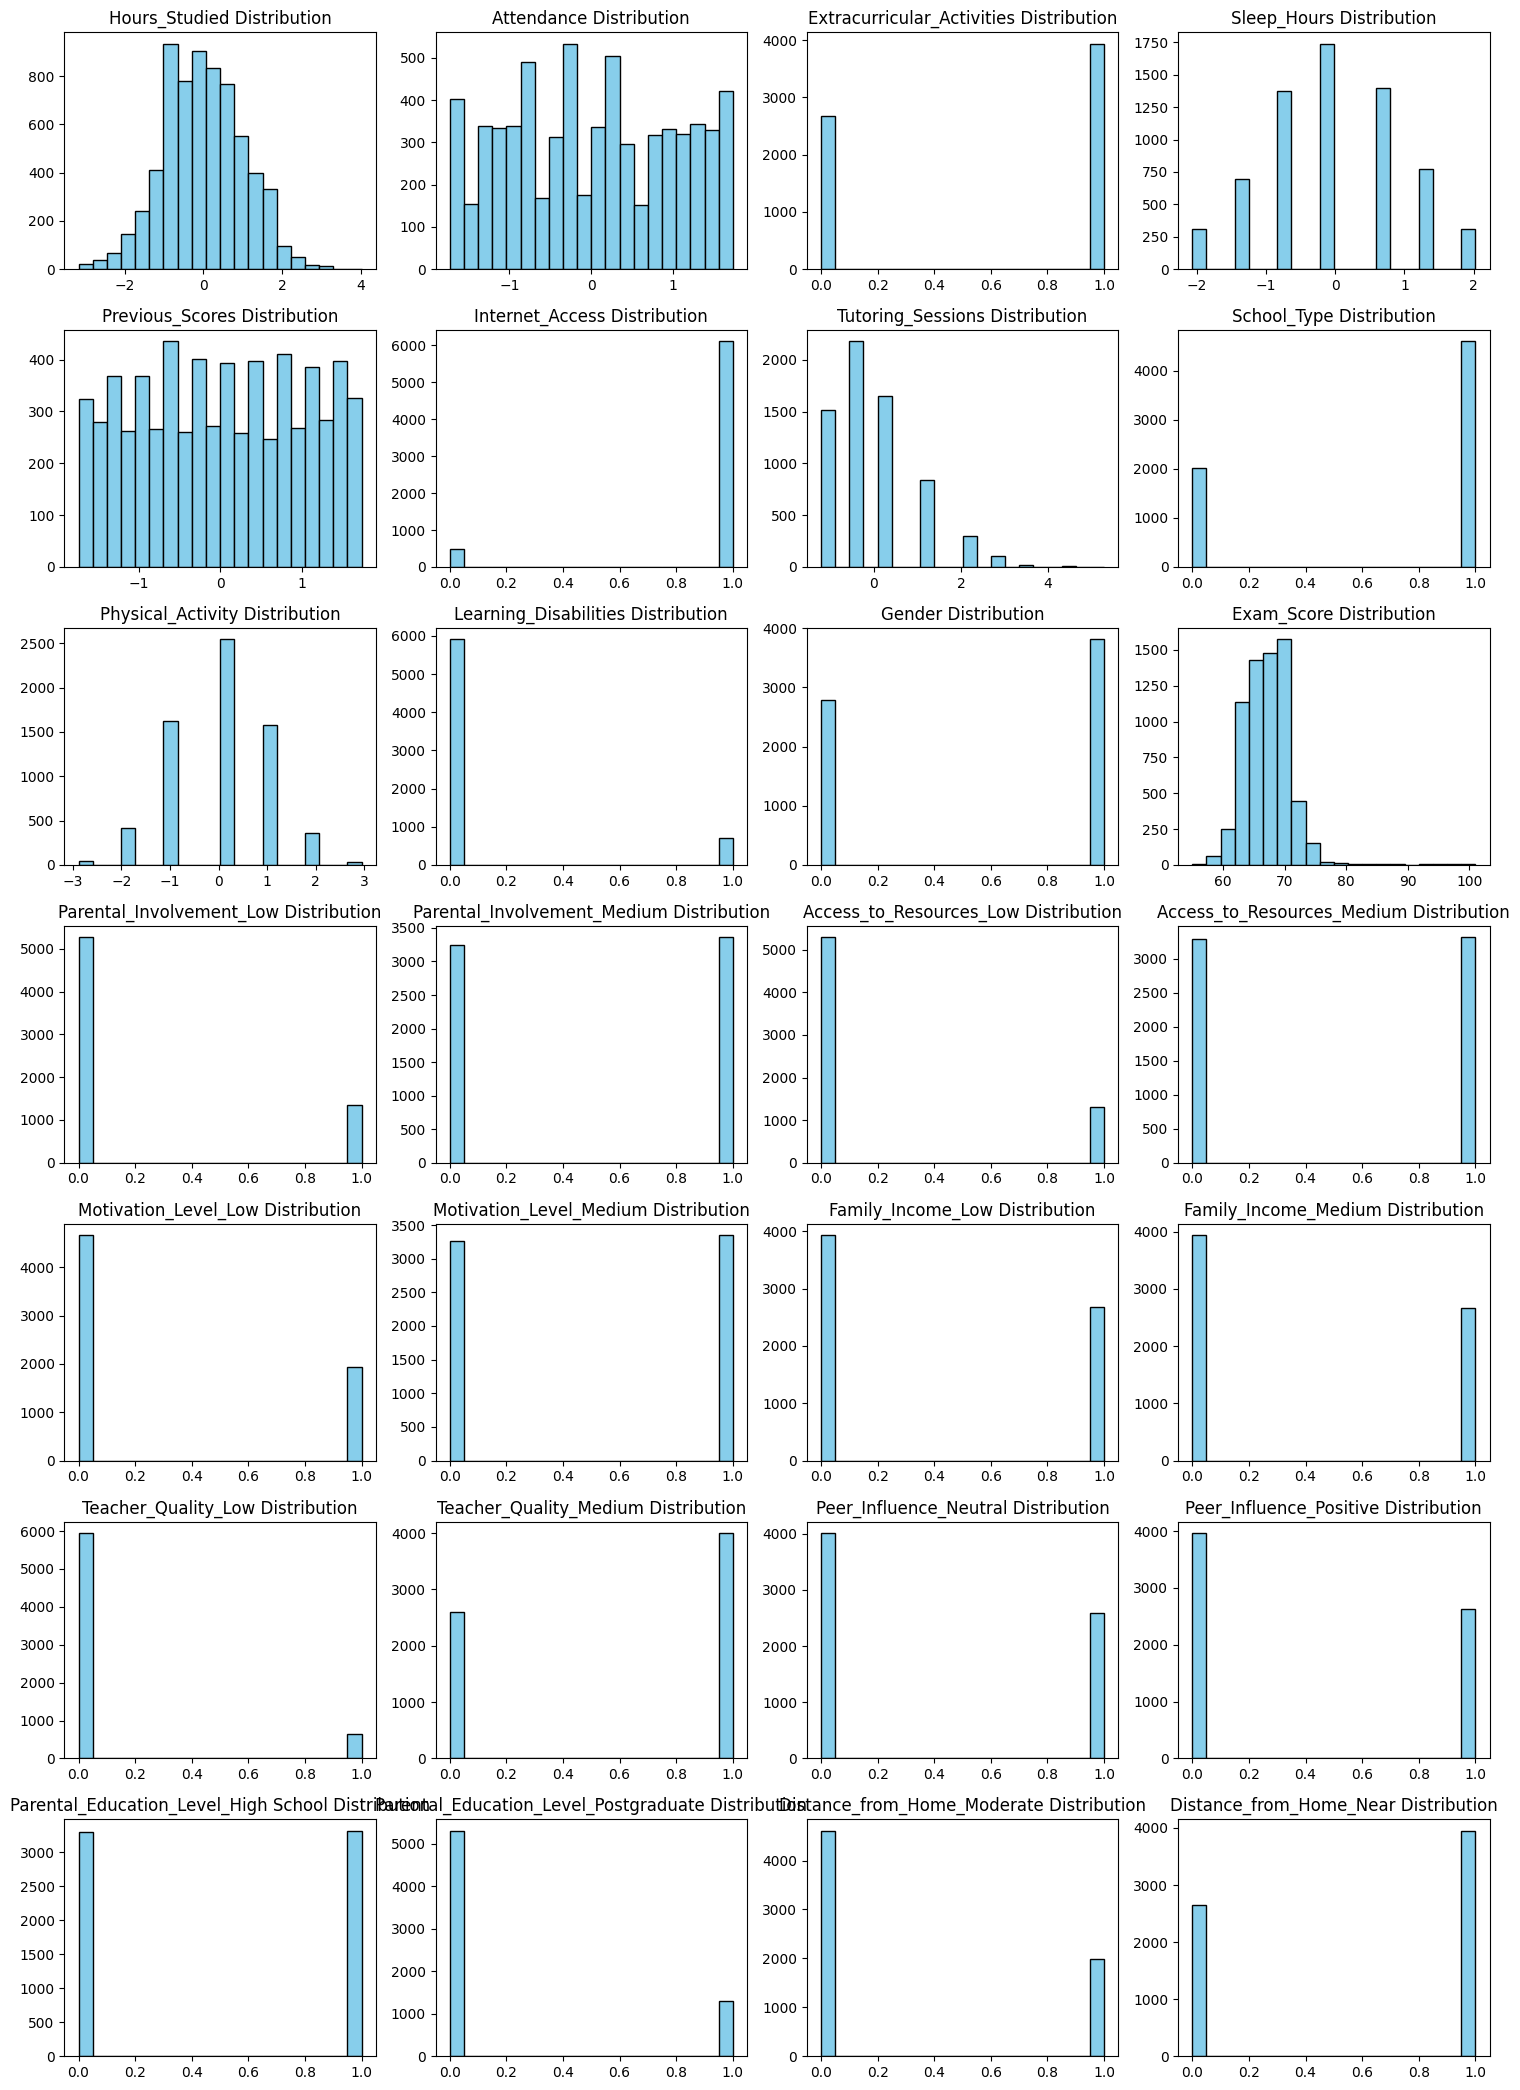

In [ ]:
# Histograms for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed
n_cols = len(numeric_cols)
n_rows = (n_cols + 3) // 4 # Calculate rows needed for a 4-column grid

plt.figure(figsize=(15, n_rows * 3)) # Adjust figure height based on rows
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 4, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

## Scatter plots (Study Hours vs Exam Score)

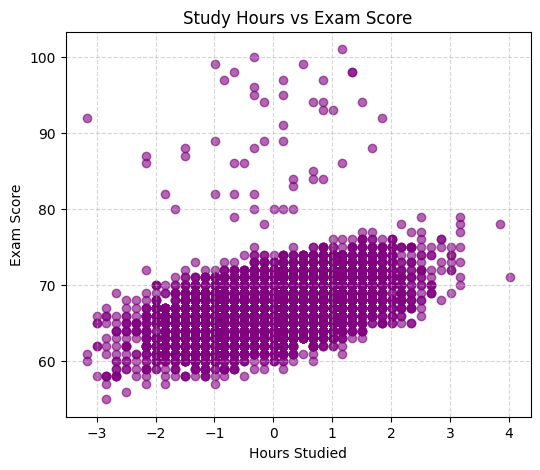

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.6, color='purple')
plt.title("Study Hours vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## Boxplots (Preparation vs Exam Score)


/tmp/ipython-input-972801395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=dff, palette="Set2")


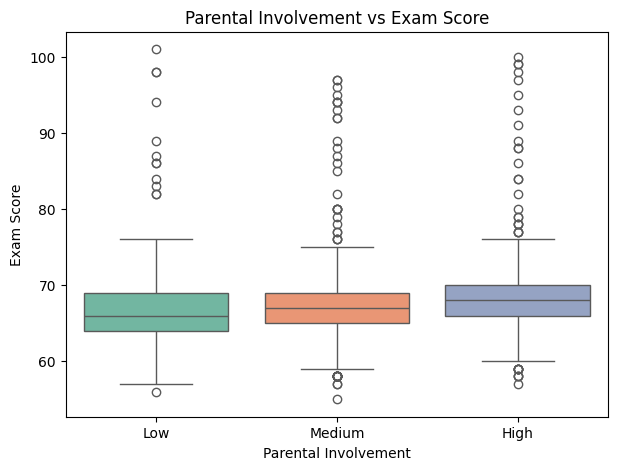

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=dff, palette="Set2")
plt.title("Parental Involvement vs Exam Score")
plt.xlabel("Parental Involvement")
plt.ylabel("Exam Score")
plt.show()


## Heatmap (feature correlation with Exam Score)

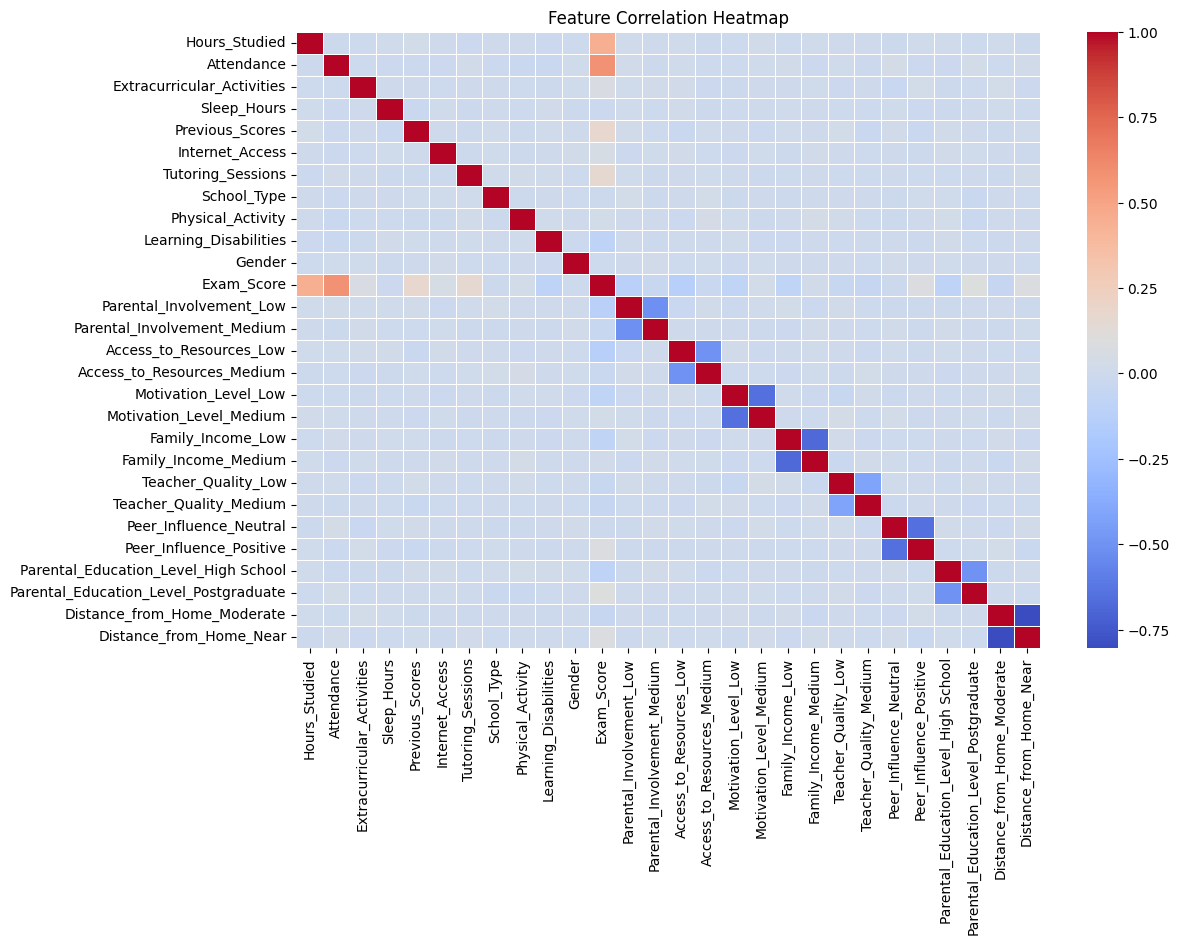

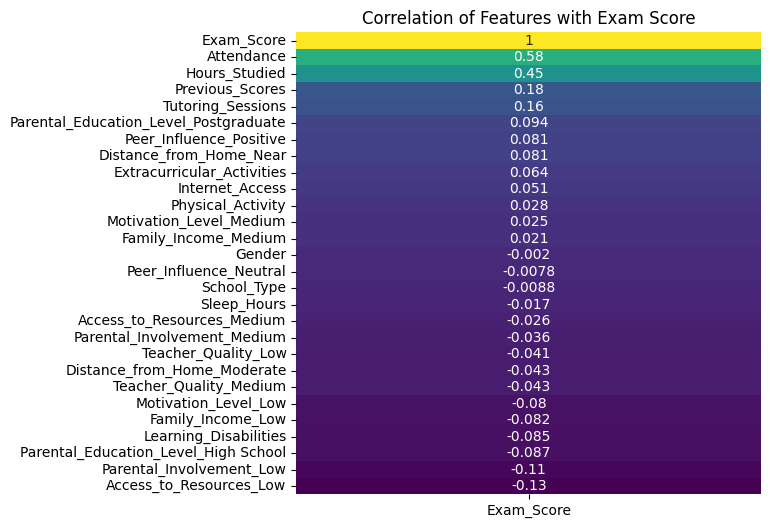

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Focus only on Exam_Score correlation
plt.figure(figsize=(6, 6))
exam_corr = corr[['Exam_Score']].sort_values(by='Exam_Score', ascending=False)
sns.heatmap(exam_corr, annot=True, cmap="viridis", cbar=False)
plt.title("Correlation of Features with Exam Score")
plt.show()


# Model Training (Linear Regression)

## Train/Test Split: 80% training, 20% testing



In [ ]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model: Linear Regression

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)

## Performance:

In [ ]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"Mean Squared Error: {mse}")
print(f'Root mean sqr: {np.sqrt(mse)}')
print(f"R-squared: {r2}")


Mean Squared Error: 3.2560199870428934
Root mean sqr: 1.8044445092722838
R-squared: 0.7696495724907313


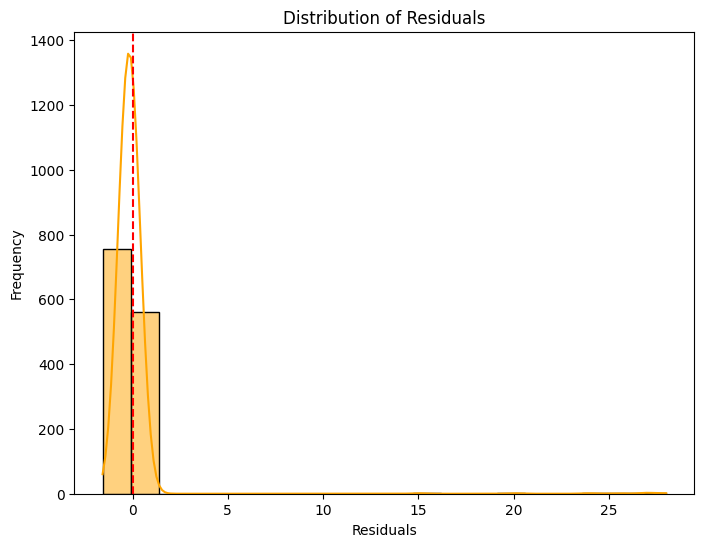

In [ ]:
# Error distribution
residuals = y_test - pred # Calculate residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color="orange")
plt.axvline(0, color="red", linestyle="--")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 5. Polynomial Regression (degree=2)

MSE: 3.5745

RMSE: 1.8906

R²: 0.7471

👉 Polynomial regression performed worse than linear — suggesting linear relationships dominate.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Polynomial features (degree=2 to start)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

# Predictions
y_pred_poly = lin_reg.predict(poly.transform(X_test))

# Evaluation
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression (degree=2)")
print(f"Mean Squared Error: {mse_poly}")
print(f"Root Mean Squared Error: {rmse_poly}")
print(f"R-squared: {r2_poly}")


Polynomial Regression (degree=2)
Mean Squared Error: 3.5744689760354715
Root Mean Squared Error: 1.8906266093640678
R-squared: 0.7471205766472642


# 6. Feature Importance / Ablation Study

All Features: R² = 0.7696

Drop Sleep: R² = 0.7698 (slightly better, Sleep adds no value)

Drop Participation: R² = 0.7662 (worse, Participation is important)

Drop Both: R² = 0.7664 (worse, confirms Participation matters more)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(features):
    X_train_sub = X_train[features]
    X_test_sub = X_test[features]

    model = LinearRegression()
    model.fit(X_train_sub, y_train)
    preds = model.predict(X_test_sub)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    return mse, rmse, r2

# Example feature sets
feature_sets = {
    "All Features": X_train.columns,
    "Drop Sleep": [f for f in X_train.columns if f != "Sleep_Hours"],
    "Drop Participation": [f for f in X_train.columns if f != "Extracurricular_Activities"],
    "Drop Both": [f for f in X_train.columns if f not in ["Sleep_Hours", "Extracurricular_Activities"]],
}

for name, features in feature_sets.items():
    mse, rmse, r2 = evaluate_model(features)
    print(f"\n{name}:")
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")



All Features:
MSE: 3.2560, RMSE: 1.8044, R2: 0.7696

Drop Sleep:
MSE: 3.2533, RMSE: 1.8037, R2: 0.7698

Drop Participation:
MSE: 3.3042, RMSE: 1.8177, R2: 0.7662

Drop Both:
MSE: 3.3015, RMSE: 1.8170, R2: 0.7664
